In [ ]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

# from Scikit-Learn
# preprocessing
from sklearn.preprocessing import StandardScaler as SS
# modeling choices
from sklearn.linear_model import LinearRegression as LR, Lasso, Ridge

# for computing principal components:


In [ ]:
# get some data
URL = "https://github.com/dvasiliu/Intro-to-Data-Science/blob/main/Data/housing.csv?raw=true"
data = pd.read_csv(URL)

In [ ]:
data

,town,tract,longitude,latitude,crime,residential,industrial,river,nox,rooms,older,distance,highway,tax,ptratio,lstat,cmedv
0,Nahant,2011,-70.955002,42.255001,0.00632,18.0,2.31,no,0.538,6.575,65.199997,4.0900,1,296,15.300000,4.98,24.000000
1,Swampscott,2021,-70.949997,42.287498,0.02731,0.0,7.07,no,0.469,6.421,78.900002,4.9671,2,242,17.799999,9.14,21.600000
2,Swampscott,2022,-70.935997,42.283001,0.02729,0.0,7.07,no,0.469,7.185,61.099998,4.9671,2,242,17.799999,4.03,34.700001
3,Marblehead,2031,-70.928001,42.292999,0.03237,0.0,2.18,no,0.458,6.998,45.799999,6.0622,3,222,18.700001,2.94,33.400002
4,Marblehead,2032,-70.921997,42.298000,0.06905,0.0,2.18,no,0.458,7.147,54.200001,6.0622,3,222,18.700001,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,Winthrop,1801,-70.986000,42.231201,0.06263,0.0,11.93,no,0.573,6.593,69.099998,2.4786,1,273,21.000000,9.67,22.400000
502,Winthrop,1802,-70.990997,42.227501,0.04527,0.0,11.93,no,0.573,6.120,76.699997,2.2875,1,273,21.000000,9.08,20.600000
503,Winthrop,1803,-70.994797,42.226002,0.06076,0.0,11.93,no,0.573,6.976,91.000000,2.1675,1,273,21.000000,5.64,23.900000
504,Winthrop,1804,-70.987503,42.223999,0.10959,0.0,11.93,no,0.573,6.794,89.300003,2.3889,1,273,21.000000,6.48,22.000000


In [ ]:
# prepare the data that go into x and y
y = data['cmedv'].values
x = data.drop(columns=['town','tract','longitude','latitude','river','cmedv']).values

### We want to get cross-validated results if we apply Lasso regression.

In [ ]:
# we show tha idea of coding K_Fold cross-validations
# we shuffle the observations
K = 10
np.random.seed(201)
folds = np.array_split(np.random.permutation(range(len(x))),K)

In [ ]:
fold = folds[0]

In [ ]:
fold

array([440, 110,  13, 363,  76, 334, 114,   2, 152, 211,  79, 294, 243,
       438, 159, 437, 247, 416, 328, 134,  64, 206,  45, 404, 384, 480,
       429, 101, 427,  36, 135, 330, 129,  58, 364, 360, 121, 482, 293,
         6, 396, 275, 283, 481, 332,  83, 196,  17,   5, 244, 270])

In [ ]:
~fold # this trick won't work for us!!

array([-441, -111,  -14, -364,  -77, -335, -115,   -3, -153, -212,  -80,
       -295, -244, -439, -160, -438, -248, -417, -329, -135,  -65, -207,
        -46, -405, -385, -481, -430, -102, -428,  -37, -136, -331, -130,
        -59, -365, -361, -122, -483, -294,   -7, -397, -276, -284, -482,
       -333,  -84, -197,  -18,   -6, -245, -271])

In [ ]:
# we need train and test
# we also need tracker variables

R2_int = []
R2_ext = []
MSE_int = []
MSE_ext = []


for fold in folds:
  mask = np.ones(len(x),dtype=bool)
  mask[fold] = False
  scale = SS()
  # input features follow different metrics, so if we care about coefficient, then scale the data correctly
  xtrain = scale.fit_transform(x[mask])
  ytrain = y[mask]
  xtest = scale.transform(x[fold])
  ytest = y[fold]

  # apply Lasso
  alpha = 0.1
  model = Lasso(alpha=alpha)
  model.fit(xtrain,ytrain)
  R2_int.append(model.score(xtrain,ytrain))
  R2_ext.append(model.score(xtest,ytest))
  MSE_int.append(np.mean((ytrain-model.predict(xtrain))**2))
  MSE_ext.append(np.mean((ytest-model.predict(xtest))**2))


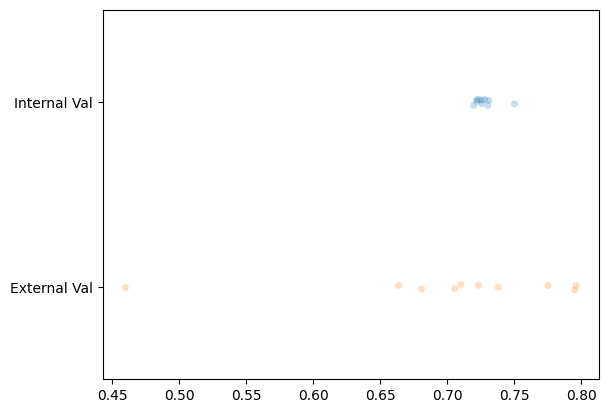

In [ ]:
#visualize

sns.stripplot(pd.DataFrame(np.column_stack([R2_int,R2_ext]),columns=['Internal Val','External Val']),orient='h',jitter=0.02,alpha=0.25)
plt.savefig('stripplot.png',dpi=300,bbox_inches='tight')
plt.show()